# Primer Parcial en Jupyter Notebook - Python para Ciencia de Datos

### Como correr el proyecto:

```bash
# para instalar un entorno virtual
py -n venv env
```

```bash
# para instalar las dependencias del proyecto
pip install -r requirements.txt
```

```bash

## Algoritmia - 2

- Función que recibe una lista y retorna la misma lista sin valores duplicados (si los hubiere), manteniendo el orden original.

In [24]:
LISTA = [1,1,2,2,2,2,2,2,2,2,3,4,4,5,6,6,7];

def eliminar_duplicados(lista: list) -> list:
    """
    Función que recibe una lista y retorna la misma lista sin valores
    duplicados (si los hubiere), manteniendo el orden original.
    """
    return list(set(lista))

print(eliminar_duplicados(LISTA))

[1, 2, 3, 4, 5, 6, 7]


## Librería pandas - 3

- **Listado de Calificaciones**

In [25]:
calificaciones = [
    {"nombre": "Juan", "matematicas": 85, "ciencias": 90, "historia": 75},
    {"nombre": "María", "matematicas": 70, "ciencias": 80, "historia": 85},
    {"nombre": "Pedro", "matematicas": 95, "ciencias": 75, "historia": 90},
    {"nombre": "Ana", "matematicas": 80, "ciencias": 85, "historia": 80},
    {"nombre": "Luis", "matematicas": 75, "ciencias": 70, "historia": 95},
    {"nombre": "Sofía", "matematicas": 90, "ciencias": 85, "historia": 75},
    {"nombre": "Carlos", "matematicas": 85, "ciencias": 90, "historia": 80},
    {"nombre": "Elena", "matematicas": 70, "ciencias": 75, "historia": 85},
    {"nombre": "Javier", "matematicas": 80, "ciencias": 85, "historia": 90},
    {"nombre": "Laura", "matematicas": 75, "ciencias": 70, "historia": 95},
    {"nombre": "Diego", "matematicas": 90, "ciencias": 85, "historia": 75},
    {"nombre": "Paula", "matematicas": 85, "ciencias": 90, "historia": 80},
    {"nombre": "Carmen", "matematicas": 70, "ciencias": 75, "historia": 85},
]

- Importo la librería pandas para su utilización

In [26]:
import pandas as pd

 - Función que recibe un listado de alumnos con sus calificaciones y retorna el promedio de calificaciones de esas asignaturas.

In [27]:
def promedio_calificaciones_asignaturas(calificaciones):
    """
    Función que recibe un listado de alumnos con sus calificaciones y retorna
    el promedio de calificaciones de esas asignaturas.
    """
    # Creo un DataFrame con las columnas
    df = pd.DataFrame(calificaciones, columns=["matematicas", "ciencias", "historia"])

    # creo un diccionario donde almaceno las materias, y sus respectivos promedios.
    promedios = [
        {
            "matematicas": df["matematicas"].mean(),
            "ciencias": df["ciencias"].mean(),
            "historia": df["historia"].mean(),
        }
    ]
    return pd.DataFrame(promedios)

- Función que recibe una lista de estudiantes con las calificaciones por asignatura y retorna un DataFrame con más altas calificaciones agrupados por materias estudiantes y sus notas.

In [28]:
def estudiantes_calificaciones_mas_altas_por_asignatura(calificaciones):
    """
    Función que recibe una lista de estudiantes con las calificaciones por asignatura
    y retorna un DataFrame con más altas calificaciones agrupados por materias
    estudiantes y sus notas.
    """

    # creo DataFrames para cada materia
    matematicas = pd.DataFrame(calificaciones, columns=["nombre", "matematicas"])
    ciencias = pd.DataFrame(calificaciones, columns=["nombre", "ciencias"])
    historia = pd.DataFrame(calificaciones, columns=["nombre", "historia"])

    # Filtro cada DataFrame con el método max() de pandas, para obtener un DataFrame
    # con los valores máximos,es decir los alumnos con las mejores notas.
    max_matematicas = matematicas[
        matematicas["matematicas"] == matematicas["matematicas"].max()
    ]
    max_ciencias = ciencias[ciencias["ciencias"] == ciencias["ciencias"].max()]
    max_historia = historia[historia["historia"] == historia["historia"].max()]

    # creo una lista de diccionarios donde manipulo la información de los DataFrames
    # creando de esta manera el solicitado por la consigna.
    mejores_alumnos_por_asignatura = [
        {
            "materia": "Matemáticas",
            "alumnos": list(max_matematicas["nombre"]),
            "nota": list(max_matematicas["matematicas"])[0],
        },
        {
            "materia": "Ciencias",
            "alumnos": list(max_ciencias["nombre"]),
            "nota": list(max_ciencias["ciencias"])[0],
        },
        {
            "materia": "Historia",
            "alumnos": list(max_historia["nombre"]),
            "nota": list(max_historia["historia"])[0],
        },
    ]

    # retorno como DataFrame la lista creada anteriormente
    return pd.DataFrame(mejores_alumnos_por_asignatura)

- Función que recibe una lista de estudiantes con las calificaciones por asignatura y retorna un DataFrame con la materia y el porcentaje de estudiantes aprobados.

In [29]:
def porcentaje_estudiantes_aprobados(calificaciones):
    """
    Función que recibe una lista de estudiantes con las calificaciones por asignatura
    y retorna un DataFrame con la materia y el porcentaje de estudiantes aprobados.
    """
    df = pd.DataFrame(calificaciones)

    total_estudiantes = df["nombre"].count()

    estudiantes_aprobados_matematicas = df[df["matematicas"] >= 60][
        "matematicas"
    ].count()
    estudiantes_aprobados_ciencia = df[df["ciencias"] >= 60]["ciencias"].count()
    estudiantes_aprobados_historia = df[df["historia"] >= 60]["historia"].count()

    porcentaje_aprobados_por_asignatura = [
        {
            "materia": "Matemáticas",
            "porcentaje_aprobados": (
                estudiantes_aprobados_matematicas / total_estudiantes
            )
            * 100,
        },
        {
            "materia": "Ciencias",
            "porcentaje_aprobados": (estudiantes_aprobados_ciencia / total_estudiantes)
            * 100,
        },
        {
            "materia": "Historia",
            "porcentaje_aprobados": (estudiantes_aprobados_historia / total_estudiantes)
            * 100,
        },
    ]

    return pd.DataFrame(porcentaje_aprobados_por_asignatura)

- Crear un DataFrame que incluya dos columnas 
     - una para el nombre del estudiante 
     - y la otra para el promedio de las notas de las asignaturas.

In [30]:
def promedio_notas_asignatura_estudiante(calificaciones=calificaciones):
    """
    Función que recibe como parámetro calificaciones de estudiantes y retorna
    un DataFrame con los nombres de los estudiantes y los promedios de
    las notas 3 materias
    """

    # creo el DataFrame con las calificaciones
    df = pd.DataFrame(calificaciones)

    # creo un DataFrame vacío para almacenar los nuevos datos
    new_df = pd.DataFrame()

    # asigno los valores al nuevo DataFrame
    new_df["nombres"] = df["nombre"]
    new_df["promedio"] = (df["matematicas"] + df["ciencias"] + df["historia"]) / 3

    return new_df

### Prueba de las funciones del punto 3

In [31]:
print("-->promedio_calificaciones_asignaturas<--")
print(promedio_calificaciones_asignaturas(calificaciones))
print("-->estudiantes_calificaciones_mas_altas_por_asignatura<--")
print(estudiantes_calificaciones_mas_altas_por_asignatura(calificaciones))
print("-->porcentaje_estudiantes_aprobados<--")
print(porcentaje_estudiantes_aprobados(calificaciones))
print("-->promedio_notas_asignatura_estudiante<--")
print(promedio_notas_asignatura_estudiante(calificaciones))

-->promedio_calificaciones_asignaturas<--
   matematicas   ciencias   historia
0    80.769231  81.153846  83.846154
-->estudiantes_calificaciones_mas_altas_por_asignatura<--
       materia                alumnos  nota
0  Matemáticas                [Pedro]    95
1     Ciencias  [Juan, Carlos, Paula]    90
2     Historia          [Luis, Laura]    95
-->porcentaje_estudiantes_aprobados<--
       materia  porcentaje_aprobados
0  Matemáticas                 100.0
1     Ciencias                 100.0
2     Historia                 100.0
-->promedio_notas_asignatura_estudiante<--
   nombres   promedio
0     Juan  83.333333
1    María  78.333333
2    Pedro  86.666667
3      Ana  81.666667
4     Luis  80.000000
5    Sofía  83.333333
6   Carlos  85.000000
7    Elena  76.666667
8   Javier  85.000000
9    Laura  80.000000
10   Diego  83.333333
11   Paula  85.000000
12  Carmen  76.666667


## Librería matplotlib - 4

- Importación de librería matplotlib

In [32]:
import matplotlib.pyplot as plt

- Basándote en el DataFrame creado, realiza un análisis visual de las calificaciones de los estudiantes en las diferentes asignaturas. Utiliza un gráfico de barras donde el eje x represente los nombres de los estudiantes y el eje y represente las calificaciones obtenidas en cada asignatura.

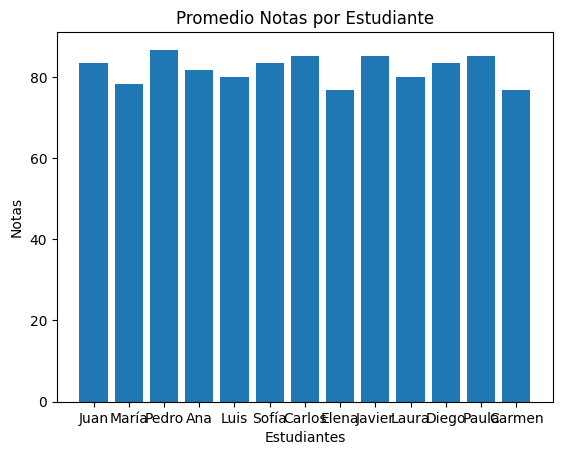

In [33]:
def mostrar_grafica_notas():
    """
    Función muestra un gráfico de barra con los alumnos en el eje de las axisas y
    los promedios de las notas en el eje de las ordenadas.
    """

    #creo un DataFrame a partir la función del ejercicio 3
    df = promedio_notas_asignatura_estudiante()

    #creo dos listas con los nombres y los promedios de las notas.
    lista_nombres = list(df["nombres"])
    lista_promedio = list(df["promedio"])

    # creo el gráfico con los datos.
    plt.bar(x=lista_nombres, height=lista_promedio)
    plt.title("Promedio Notas por Estudiante")
    plt.xlabel("Estudiantes")
    plt.ylabel("Notas")

    # mostrar el gráfico creado anteriormente.
    plt.show()

# ejecuto la función.
mostrar_grafica_notas()